# Truncation error analysis

In [1]:
import numpy as np 
import src.animation

def analyseError(
    scheme,
    config,
    generateIC,
    analyticalSolution,
    N=5,
    increaseSpatialResolution = 2, 
    increaseTemporalResolution = 1, 
    debug=False,
    waveScheme = None, 
    advection = False,
    potential = None,
):
    NX    = config["resolution"]
    L     = config["domainSize"]
    tEnd  = config["tEnd"]
    dx    = L / NX
    dt    = config["dt"]
    error = np.zeros(N)

    resolutions = []
    average_timesteps = []

    for i in range(N):
        config["resolution"] = NX
        solver = scheme(config, generateIC)
        #solver.setExternalPotentialFunction(potential)
        if waveScheme is not None:
            waveSolver = waveScheme(config, generateIC)
            #waveSolver.setExternalPotentialFunction(potential)
        else:
            waveSolver = None 

        dx = solver.dx 
        nt = 0
        timesteps = [0]
        solver.run()
        if waveSolver is not None:
            waveSolver.run()

        if waveScheme is None:
            if advection:
                ana, _  = analyticalSolution(*solver.grid, solver.dx, solver.t)
            else:
                ana = np.abs(analyticalSolution(*solver.grid, solver.dx, solver.t)) ** 2
        else:
            ana = np.abs(waveSolver.getPsi())**2

        num = solver.getDensity()

        error[i] = np.mean(np.abs(num - ana))
        resolutions.append(dx)
        average_timesteps.append(np.mean(timesteps))

        if debug:
            print("dx ", dx, " dt ", np.mean(timesteps))
            print("error [i]: ", i, error[i])
            animation.drawFrame(solver, waveSolver = waveSolver, advection=advection)
            plt.show()

        NX *= increaseSpatialResolution
        NX = int(NX)
        dt /= increaseTemporalResolution
            
    return error, resolutions, average_timesteps

# Analyse accuracy of advection schemes

In [2]:
from IPython.display import display, Markdown, Latex 

%run src/advection_test_suite.py

In [3]:
test_list = ["gaussian", "tophat"]
schemes = ["upwind", "muscl", "ppm"]
error_lists = []
for t in test_list: 
    error_list = []
    for s in schemes: 
        config = getBaseConfig()
        config["fix1"] = True
        config["fix2"] = True
        e, _, _ = analyseError(
            algorithms[s],
            config,
            tests[t],
            tests[t],
            N=7,
            increaseSpatialResolution = 2, 
            increaseTemporalResolution = 1, 
            debug=False,
            waveScheme = None, 
            advection = True,
            potential = None,
        )
        error_list.append(e)

    error_lists.append(error_list)

Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps


KeyboardInterrupt: 

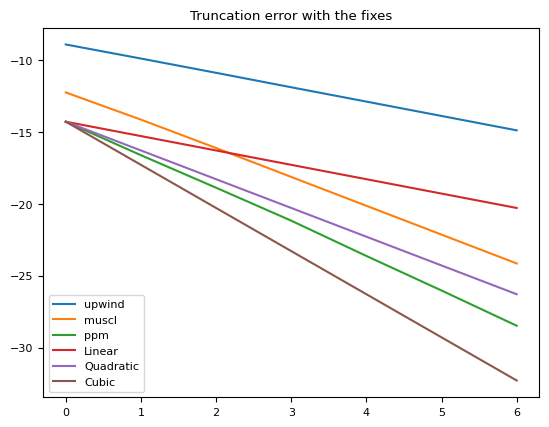

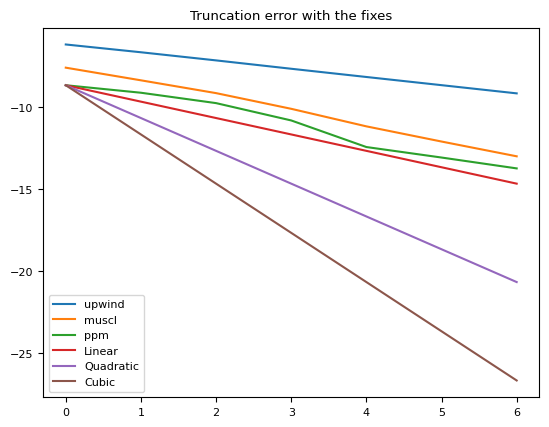

In [7]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error with the fixes")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

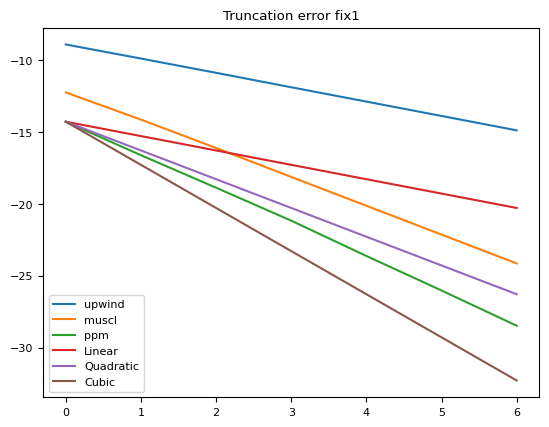

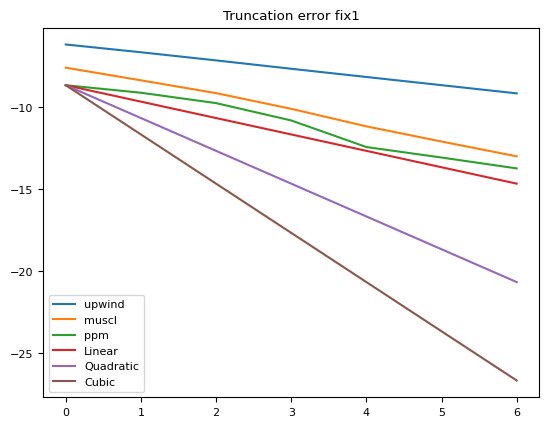

In [8]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix1")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

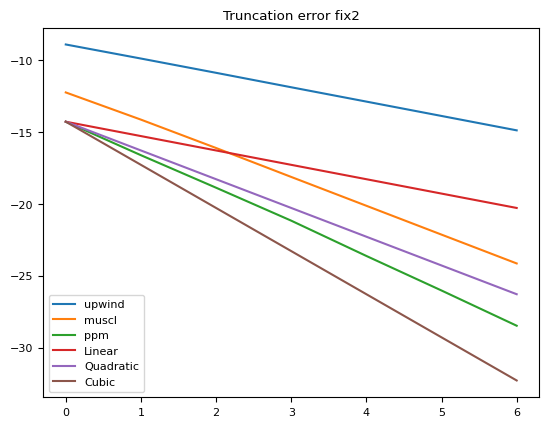

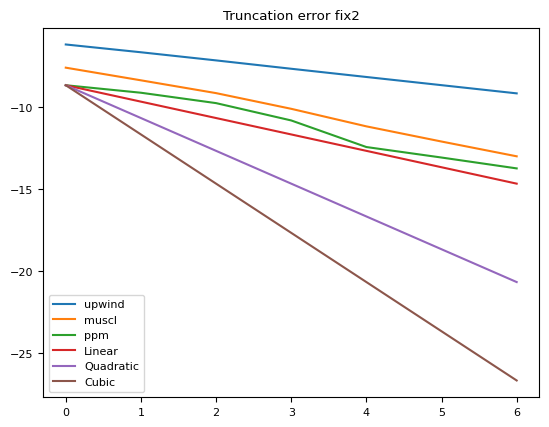

In [9]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix2")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

In [10]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix1 and fix2")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

KeyboardInterrupt: 

# Analyse accuracy of Schroedinger-schemes

In [4]:
from IPython.display import display, Markdown, Latex 

%run src/sps_test_suite.py

# Test: accuracy test 1D

tEnd 0.3183098861837907
t = 0 t_parabolic = 0.0026041666666666665 t_velocity = 6250000.0 t_acceleration = 1414.213562373095 t_gravity = 10000.0
t = 0.0026041666666666665 t_parabolic = 0.0026041666666666665 t_velocity = 41.09781320755046 t_acceleration = 1.4032811848253257 t_gravity = 10000.0
t = 0.005208333333333333 t_parabolic = 0.0026041666666666665 t_velocity = 20.57356290723212 t_acceleration = 0.9928593082787933 t_gravity = 10000.0
t = 0.0078125 t_parabolic = 0.0026041666666666665 t_velocity = 13.743103908103368 t_acceleration = 0.8114692355178236 t_gravity = 10000.0
t = 0.010416666666666666 t_parabolic = 0.0026041666666666665 t_velocity = 10.33617683134482 t_acceleration = 0.7037280879671164 t_gravity = 10000.0
t = 0.013020833333333332 t_parabolic = 0.0026041666666666665 t_velocity = 8.298741199498973 t_acceleration = 0.6305574094323642 t_gravity = 10000.0
t = 0.015624999999999998 t_parabolic = 0.0026041666666666665 t_velocity = 6.946134430625747 t_acceleration = 0.57687517991236

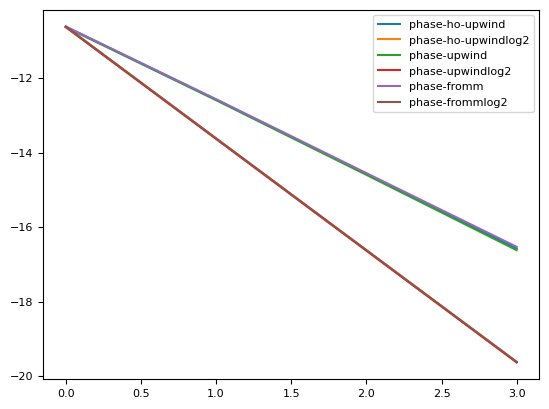

In [8]:
N = 4
#test_names_1d  = ['accuracy test']
#test_names  = ["harmonic oscillator coherent state"]
test_names  = ["accuracy test 1D"]
#test_names  = ['cosmo 2D']
#test_names = ['periodic gaussian wave packet']#, 'accuracy test 3D']
schemes_for_accuracy_test = ["phase-ho-upwind", "phase-upwind", "phase-fromm"]#, "phase-ho-upwind_leer", "phase-ho-upwind_albada"]
#schemes_for_accuracy_test = ["phase-ho-upwind_albada"]"wave-ftcs2", "wave-ftcs4", 
advection  = False
waveScheme = wave_schemes.SpectralScheme

def ppmConfig(c):
    c["stencilOrder"] = 3
    c["timeOrder"]    = 3
    c["fix1"] = False
    c["fix2"] = True
    c["phaseYlim"] = [-1, 1]
    c["C_parabolic"] = 0.4
    c["C_velocity"]  = 0.5

increaseSpatialResolution  = 2
increaseTemporalResolution = 1 
suffix = ""
plotRuns = False

for test_name in test_names:
    test, testConfig, potential = test_list[test_name]

    display(Markdown('#' + " Test: " + test_name))

    truncations_errors = {}

    for scheme_name in schemes_for_accuracy_test:
        scheme, schemeConfig = scheme_list[scheme_name]

        c = getBaseConfig()
        testConfig(c)
        schemeConfig(c)
        c["tEnd"] = 0.1

        p, dx, dt = analyseError(
            scheme,
            c,
            test,
            test,
            N=N,
            increaseTemporalResolution = increaseTemporalResolution, 
            increaseSpatialResolution = increaseSpatialResolution,
            debug=plotRuns,
            waveScheme= waveScheme,
            advection = advection,
            potential = potential
        )

        truncations_errors[scheme_name] = {
            "errors": p,
            "dx": dx,
            "dt": dt
        }
        filename = "data/truncation_error_" + test_name.replace(" ", "_") + "_" + scheme_name.replace(" ", "_") + suffix + ".npz"
        print(filename)
        np.savez(filename, **(truncations_errors[scheme_name]))

import matplotlib.pyplot as plt 

for key in truncations_errors.keys(): 
    print(np.log(truncations_errors[key]["errors"])/np.log(2))

    xx = np.arange(len(truncations_errors[key]["errors"]))
    plt.plot(np.log(truncations_errors[key]["errors"])/np.log(2), label=key)
    plt.plot(np.log(truncations_errors[key]["errors"][0]*1/2**(3*xx))/np.log(2), label=key + "log2")
plt.legend()

In [ ]:
from sympy import *

x, y, z = symbols('x y z')

init_printing(use_unicode=True)

[-15.57548444 -19.1735404  -23.27547505]